# Machine Learning

# Project-01 Data Preprocessing 

## Objective:
The main objective of this project is to design and implement a robust data
preprocessing system that addresses common challenges such as missing values,
outliers, inconsistent formatting, and noise. By performing effective data preprocessing,
the project aims to enhance the quality, reliability, and usefulness of the data for
machine learning.

## 1. Acquire the dataset

Dataset : Employee.csv

## 2. import the libraries 

In [938]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 3. import the dataset 

In [939]:
df=pd.read_csv('Employee.csv')
df.shape

(148, 6)

In [940]:
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


## Data Exploration

In [941]:
# delete duplicate rows

In [942]:
df.duplicated().sum()

4

In [943]:
df.drop_duplicates(inplace=True)
df.shape
# 4 duplicates removed 

(144, 6)

In [944]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
139,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
140,TCS,33.0,9024.0,Calcutta,India,1
141,Infosys,44.0,4034.0,Delhi,India,1
142,TCS,33.0,5034.0,Mumbai,India,1


In [945]:
df.head(5)

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [946]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  136 non-null    object 
 1   Age      127 non-null    float64
 2   Salary   121 non-null    float64
 3   Place    130 non-null    object 
 4   Country  144 non-null    object 
 5   Gender   144 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 6.9+ KB


In [947]:
#Check if there is any null values
df.isna().sum()

Company     8
Age        17
Salary     23
Place      14
Country     0
Gender      0
dtype: int64

In [948]:
df.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

In [949]:
#Unique value in each columns

In [950]:
unique=df.nunique()
unique

Company     6
Age        29
Salary     40
Place      11
Country     1
Gender      2
dtype: int64

In [951]:
df['Company'].unique()

array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
       'Congnizant', 'Infosys Pvt Lmt'], dtype=object)

In [952]:
# observations: here 'Infosys' & 'Infosys Pvt Lmt','TCS' & 'Tata Consultancy Services','CTS' & 'Congnizant'('Cognizant') 
# are same.
# Treat them appropriately.

In [953]:
df['Company'].replace('Infosys Pvt Lmt','Infosys',inplace=True)
df['Company'].replace('Tata Consultancy Services','TCS',inplace=True)
df['Company'].replace('CTS','Congnizant',inplace=True)
df['Company'].replace('Congnizant','Cognizant',inplace=True)
df['Company'].unique()

array(['TCS', 'Infosys', 'Cognizant', nan], dtype=object)

In [954]:
df['Age'].unique()

array([20., 30., 35., 40., 23., nan, 34., 45., 18., 22., 32., 37., 50.,
       21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
       33., 17.,  0., 54.])

In [955]:
df['Salary'].unique()

array([  nan, 2300., 3000., 4000., 5000., 6000., 7000., 8000., 9000.,
       1089., 1234., 3030., 3045., 3184., 4824., 5835., 7084., 8943.,
       8345., 9284., 9876., 2034., 7654., 2934., 4034., 5034., 8202.,
       9024., 4345., 6544., 6543., 3234., 4324., 5435., 5555., 8787.,
       3454., 5654., 5009., 5098., 3033.])

In [956]:
df['Place'].unique()
# spelling correction for 'Podicherry'.

array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
      dtype=object)

In [957]:
df['Place'].replace('Podicherry','Pondicherry',inplace=True)
df['Place'].unique()

array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Pondicherry', 'Cochin',
       nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
      dtype=object)

In [958]:
df['Country'].unique()

array(['India'], dtype=object)

In [959]:
df['Gender'].unique()

array([0, 1], dtype=int64)

In [960]:
#Statistical analysis

In [961]:
df.describe()

,Age,Salary,Gender
count,127.000000,121.000000,144.000000
mean,30.527559,5283.471074,0.222222
std,11.114717,2585.373600,0.417191
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,33.000000,5000.000000,0.000000
75%,37.500000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [962]:
df.head(5)

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


## Data Cleaning

In [963]:
#Outlier detection
#using IQR
#Chances of getting outliers are only in the 'Age' and 'Salary' columns.

In [964]:
df1=pd.read_csv('Employee.csv')

In [965]:
df1.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [966]:
#Outlier detection in 'Age' column=IQR

In [967]:
q1=df['Age'].quantile(0.25)
q1

22.0

In [968]:
q3=df['Age'].quantile(0.75)
q3

37.5

In [969]:
iqr=q3-q1
iqr

15.5

In [970]:
lower=q1-1.5*iqr
lower

-1.25

In [971]:
upper=q3+1.5*iqr
upper

60.75

In [972]:
#outlier rows
df[(df['Age']<lower) & (df['Age']>upper)]
#no outliers detected using IQR. But Age=0 is an outlier.

,Company,Age,Salary,Place,Country,Gender


In [973]:
#Outlier detection in 'Salary' column=IQR

In [974]:
q1=df['Salary'].quantile(0.25)
q1

3030.0

In [975]:
q3=df['Salary'].quantile(0.75)
q3

8000.0

In [976]:
iqr=q3-q1
iqr

4970.0

In [977]:
lower=q1-1.5*iqr
lower

-4425.0

In [978]:
upper=q3+1.5*iqr
upper

15455.0

In [979]:
#outlier rows
df[(df['Salary']<lower) & (df['Salary']>upper)]
#no outliers detected using IQR.

,Company,Age,Salary,Place,Country,Gender


In [980]:
#Treat missing values

In [981]:
df.isna().sum()

Company     8
Age        17
Salary     23
Place      14
Country     0
Gender      0
dtype: int64

In [982]:
# For the 'Company' column we have rows with 'nan' values. It should be replacedby mode()-most repeated value, "TCS"

In [983]:
df['Company'].mode()[0]

'TCS'

In [984]:
df['Company'].fillna(df['Company'].mode()[0], inplace=True)

In [985]:
df.isna().sum()

Company     0
Age        17
Salary     23
Place      14
Country     0
Gender      0
dtype: int64

In [986]:
#treat 'Age' column
# replace the value'0' in Age as 'NaN'
# For the 'Age' column, fillna by mean value

In [987]:
df[df['Age']==0]

,Company,Age,Salary,Place,Country,Gender
87,Infosys,0.0,3030.0,Calcutta,India,0
91,TCS,0.0,3045.0,Delhi,India,0
100,Cognizant,0.0,2034.0,Pondicherry,India,0
106,TCS,0.0,9024.0,Chennai,India,1
110,Infosys,0.0,3234.0,Mumbai,India,0
120,Cognizant,0.0,1234.0,Calcutta,India,0


In [988]:
df['Age'].replace(0,np.nan,inplace=True)

In [989]:
df.isna().sum()

Company     0
Age        23
Salary     23
Place      14
Country     0
Gender      0
dtype: int64

In [990]:
df.describe()
#now the minimum value for 'Age' is 17 and max is 54 (no outliers). so replace the null values using mean()

,Age,Salary,Gender
count,121.000000,121.000000,144.000000
mean,32.041322,5283.471074,0.222222
std,8.989250,2585.373600,0.417191
min,17.000000,1089.000000,0.000000
25%,23.000000,3030.000000,0.000000
50%,33.000000,5000.000000,0.000000
75%,40.000000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [991]:
rounded_mean=round(df['Age'].mean(),0)
rounded_mean

32.0

In [992]:
df['Age'].fillna(rounded_mean,inplace=True)

In [993]:
df.isna().sum()

Company     0
Age         0
Salary     23
Place      14
Country     0
Gender      0
dtype: int64

In [994]:
# Treat 'Salary' column
# replace the nulls by mean value

In [995]:
rounded_salary=round(df['Salary'].mean(),0)
rounded_salary

5283.0

In [996]:
df['Salary'].fillna(rounded_salary,inplace=True)

In [997]:
df.isna().sum()

Company     0
Age         0
Salary      0
Place      14
Country     0
Gender      0
dtype: int64

In [998]:
# Treat 'Place' column
# replace the nulls by mode value

In [999]:
df['Place'].mode()

0    Mumbai
Name: Place, dtype: object

In [1000]:
df['Place'].fillna(df['Place'].mode()[0],inplace=True)

In [1001]:
df.isna().sum()

Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64

In [1002]:
# Now the dataset df is cleaned 

In [1003]:
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5283.0,Chennai,India,0
1,Infosys,30.0,5283.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
139,Infosys,22.0,8202.0,Mumbai,India,0
140,TCS,33.0,9024.0,Calcutta,India,1
141,Infosys,44.0,4034.0,Delhi,India,1
142,TCS,33.0,5034.0,Mumbai,India,1


# Data Analysis

In [1004]:
#Filter the data with age >40 and salary<5000

In [1005]:
df[(df['Age']>40) & (df['Salary']<5000)]

,Company,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
85,Infosys,41.0,3000.0,Delhi,India,0
92,Infosys,54.0,3184.0,Mumbai,India,0
103,Infosys,44.0,4034.0,Delhi,India,0


In [1006]:
#Plot the chart with age and salary
#correlation between salary and age

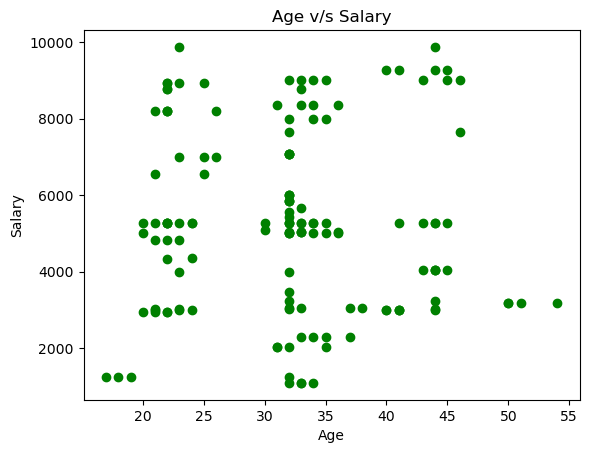

In [1007]:
plt.scatter(df['Age'],df['Salary'],color='g')
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age v/s Salary")
plt.show()

### Observations from scatter plot: 
1. There is no visible correlation between the salary and age of an employee.

In [1008]:
#Count the number of people from each place and represent it visually

In [1009]:
df['Place'].value_counts()

Mumbai         48
Calcutta       32
Chennai        14
Delhi          14
Cochin         13
Noida           8
Hyderabad       8
Pondicherry     3
Pune            2
Bhopal          1
Nagpur          1
Name: Place, dtype: int64

In [1010]:
x=df['Place'].value_counts().index
x

Index(['Mumbai', 'Calcutta', 'Chennai', 'Delhi', 'Cochin', 'Noida',
       'Hyderabad', 'Pondicherry', 'Pune', 'Bhopal', 'Nagpur'],
      dtype='object')

In [1011]:
y=df['Place'].value_counts().values
y

array([48, 32, 14, 14, 13,  8,  8,  3,  2,  1,  1], dtype=int64)

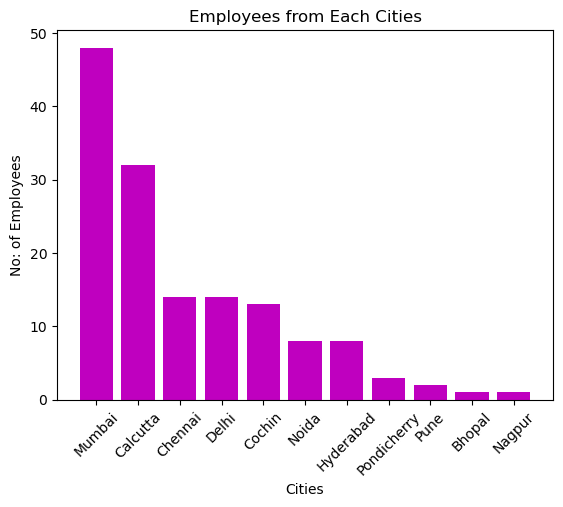

In [1012]:
plt.bar(x,y,color='m')
plt.xlabel("Cities")
plt.ylabel("No: of Employees")
plt.title("Employees from Each Cities")
plt.xticks(rotation=45)
plt.show()

### Observations from bar chart: 
1. Most of the employees are from Mumbai.
2. Nagpur consisting of the least number of employee

# Data Encoding

In [1013]:
#categorical data encoding

In [1014]:
df.head(1)

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5283.0,Chennai,India,0


In [1015]:
# the 'Gender' column is a 'Nominal categorical' column. so it couldn't be ranked like this.
# Assume M=0 & F=1

In [1016]:
df['Gender'].replace(0,'M',inplace=True)

In [1017]:
df['Gender'].replace(1,'F',inplace=True)

In [1018]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5283.0,Chennai,India,M
1,Infosys,30.0,5283.0,Mumbai,India,M
2,TCS,35.0,2300.0,Calcutta,India,M
3,Infosys,40.0,3000.0,Delhi,India,M
4,TCS,23.0,4000.0,Mumbai,India,M


In [1019]:
df['Gender'].value_counts()

M    112
F     32
Name: Gender, dtype: int64

In [1020]:
df.describe()

,Age,Salary
count,144.000000,144.000000
mean,32.034722,5283.395833
std,8.234681,2368.350171
min,17.000000,1089.000000
25%,23.750000,3045.000000
50%,32.000000,5283.000000
75%,36.000000,7084.000000
max,54.000000,9876.000000


In [1021]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  144 non-null    object 
 1   Age      144 non-null    float64
 2   Salary   144 non-null    float64
 3   Place    144 non-null    object 
 4   Country  144 non-null    object 
 5   Gender   144 non-null    object 
dtypes: float64(2), object(4)
memory usage: 6.9+ KB


In [1022]:
# Here we have 4 categorical columns, "Company", "Place", "Country" & "Gender".
# Four of them are Nominal Categorical columns.
# since only one country's data is available,so we can skip the 'Country' column.

In [1023]:
df.drop('Country',axis=1,inplace=True)
df

,Company,Age,Salary,Place,Gender
0,TCS,20.0,5283.0,Chennai,M
1,Infosys,30.0,5283.0,Mumbai,M
2,TCS,35.0,2300.0,Calcutta,M
3,Infosys,40.0,3000.0,Delhi,M
4,TCS,23.0,4000.0,Mumbai,M
...,...,...,...,...,...
139,Infosys,22.0,8202.0,Mumbai,M
140,TCS,33.0,9024.0,Calcutta,F
141,Infosys,44.0,4034.0,Delhi,F
142,TCS,33.0,5034.0,Mumbai,F


## OneHotEncoding

In [1024]:
#Encoding Categorical datas using OneHotEncoding

In [1025]:
df['Company'].unique()

array(['TCS', 'Infosys', 'Cognizant'], dtype=object)

In [1026]:
df['Place'].unique()

array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Pondicherry', 'Cochin',
       'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'], dtype=object)

In [1027]:
df['Gender'].unique()

array(['M', 'F'], dtype=object)

In [1028]:
#use 'OneHotEncoder' to create dummy variables for each of the nominal categorical columns.

In [1029]:
# import libraries 
from sklearn.preprocessing import OneHotEncoder

In [1030]:
ohe=OneHotEncoder()

In [1031]:
ohe
#created an object in the class()

OneHotEncoder()

In [1032]:
#dummies into an array
df_array=ohe.fit_transform(df[['Company','Place','Gender']]).toarray()
df_array

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [1033]:
ohe.categories_

[array(['Cognizant', 'Infosys', 'TCS'], dtype=object),
 array(['Bhopal', 'Calcutta', 'Chennai', 'Cochin', 'Delhi', 'Hyderabad',
        'Mumbai', 'Nagpur', 'Noida', 'Pondicherry', 'Pune'], dtype=object),
 array(['F', 'M'], dtype=object)]

In [1034]:
categories=[np.array(['Cognizant','Infosys','TCS']),
            np.array(['Bhopal','Calcutta','Chennai','Cochin','Delhi','Hyderabad','Mumbai','Nagpur','Noida','Pondicherry','Pune']),
            np.array(['F','M'])]


single_list=[innerlistone for main_array in categories for innerlistone in main_array]
single_list
#now it's in one list.

['Cognizant',
 'Infosys',
 'TCS',
 'Bhopal',
 'Calcutta',
 'Chennai',
 'Cochin',
 'Delhi',
 'Hyderabad',
 'Mumbai',
 'Nagpur',
 'Noida',
 'Pondicherry',
 'Pune',
 'F',
 'M']

In [1035]:
# create a dataset using the dummies array,'df_array' created using onehotencoder,
# use 'single_list' for column labelling.
df_new=pd.DataFrame(df_array,columns=single_list)
df_new

,Cognizant,Infosys,TCS,Bhopal,Calcutta,Chennai,Cochin,Delhi,Hyderabad,Mumbai,Nagpur,Noida,Pondicherry,Pune,F,M
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
140,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
141,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
142,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1036]:
#concat our dataset 'df' with 'df_new'.

In [1037]:
df_ml=pd.concat([df,df_new],axis=1)
df_ml

,Company,Age,Salary,Place,Gender,Cognizant,Infosys,TCS,Bhopal,Calcutta,...,Cochin,Delhi,Hyderabad,Mumbai,Nagpur,Noida,Pondicherry,Pune,F,M
0,TCS,20.0,5283.0,Chennai,M,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Infosys,30.0,5283.0,Mumbai,M,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,TCS,35.0,2300.0,Calcutta,M,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Infosys,40.0,3000.0,Delhi,M,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,TCS,23.0,4000.0,Mumbai,M,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Infosys,22.0,8202.0,Mumbai,M,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
140,TCS,33.0,9024.0,Calcutta,F,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
141,Infosys,44.0,4034.0,Delhi,F,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
142,TCS,33.0,5034.0,Mumbai,F,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1038]:
#delete the categorical column from dataset 'df_ml'
#df_ml.drop(['index','Company','Place','Gender'],axis=1,inplace=True)

In [1039]:
# Final encoded dataset for Machine Learning,
df_ml

,Company,Age,Salary,Place,Gender,Cognizant,Infosys,TCS,Bhopal,Calcutta,...,Cochin,Delhi,Hyderabad,Mumbai,Nagpur,Noida,Pondicherry,Pune,F,M
0,TCS,20.0,5283.0,Chennai,M,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Infosys,30.0,5283.0,Mumbai,M,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,TCS,35.0,2300.0,Calcutta,M,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Infosys,40.0,3000.0,Delhi,M,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,TCS,23.0,4000.0,Mumbai,M,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Infosys,22.0,8202.0,Mumbai,M,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
140,TCS,33.0,9024.0,Calcutta,F,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
141,Infosys,44.0,4034.0,Delhi,F,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
142,TCS,33.0,5034.0,Mumbai,F,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## LabelEncoder

In [1040]:
# example for encoding using LabelEncoder

In [1057]:
#save the cleaned dataset 'df' in external
df.to_csv('Employee_cleaned.csv',index=False)

In [1042]:
#import library
from sklearn.preprocessing import LabelEncoder

In [1043]:
label=LabelEncoder()
print(label)

LabelEncoder()


In [1058]:
df_sample=pd.read_csv('Employee_cleaned.csv')
df_sample['Company']=label.fit_transform(df_sample['Company'])

In [1059]:
df_sample

,Company,Age,Salary,Place,Gender
0,2,20.0,5283.0,Chennai,M
1,1,30.0,5283.0,Mumbai,M
2,2,35.0,2300.0,Calcutta,M
3,1,40.0,3000.0,Delhi,M
4,2,23.0,4000.0,Mumbai,M
...,...,...,...,...,...
139,1,22.0,8202.0,Mumbai,M
140,2,33.0,9024.0,Calcutta,F
141,1,44.0,4034.0,Delhi,F
142,2,33.0,5034.0,Mumbai,F


# Feature Scaling

In [1066]:
#all numerical columns in the dataset to be standardized before ML model generation
# here we have 'Age' and 'Salary' columns only.

In [1063]:
#cleaned dataset
df

,Company,Age,Salary,Place,Gender
0,TCS,20.0,5283.0,Chennai,M
1,Infosys,30.0,5283.0,Mumbai,M
2,TCS,35.0,2300.0,Calcutta,M
3,Infosys,40.0,3000.0,Delhi,M
4,TCS,23.0,4000.0,Mumbai,M
...,...,...,...,...,...
139,Infosys,22.0,8202.0,Mumbai,M
140,TCS,33.0,9024.0,Calcutta,F
141,Infosys,44.0,4034.0,Delhi,F
142,TCS,33.0,5034.0,Mumbai,F


## StandardScaler 

In [1068]:
# using standard scaler

In [1072]:
data=df.iloc[ : ,[1,2]]
data

,Age,Salary
0,20.0,5283.0
1,30.0,5283.0
2,35.0,2300.0
3,40.0,3000.0
4,23.0,4000.0
...,...,...
139,22.0,8202.0
140,33.0,9024.0
141,44.0,4034.0
142,33.0,5034.0


In [1087]:
#import libraries
from sklearn.preprocessing import StandardScaler

In [1088]:
scaler=StandardScaler().fit(data)
print(scaler)

StandardScaler()


In [1089]:
#standardize the data
data_scaled=scaler.transform(data)

In [1083]:
print(data_scaled)

[[0.08108108 0.47729601]
 [0.35135135 0.47729601]
 [0.48648649 0.13781723]
 [0.62162162 0.21748037]
 [0.16216216 0.33128485]
 [0.40540541 0.44508934]
 [0.40540541 0.55889382]
 [0.16216216 0.6726983 ]
 [0.45945946 0.78650279]
 [0.75675676 0.90030727]
 [0.16216216 0.47729601]
 [0.45945946 0.        ]
 [0.75675676 0.47729601]
 [0.02702703 0.01650165]
 [0.62162162 0.21748037]
 [0.16216216 0.21748037]
 [0.16216216 0.2208945 ]
 [0.45945946 0.44508934]
 [0.13513514 0.47729601]
 [0.40540541 0.47729601]
 [0.54054054 0.22260157]
 [0.89189189 0.23842039]
 [0.10810811 0.42505975]
 [0.40540541 0.54011608]
 [0.40540541 0.68225788]
 [0.16216216 0.89382042]
 [0.45945946 0.82576534]
 [0.75675676 0.93262775]
 [0.16216216 1.        ]
 [0.48648649 0.10754524]
 [0.78378378 0.74712644]
 [0.08108108 0.20996927]
 [0.75675676 0.33515421]
 [0.51351351 0.44895869]
 [0.24324324 0.80949129]
 [0.48648649 0.90303858]
 [0.40540541 0.47729601]
 [0.48648649 0.47729601]
 [0.45945946 0.13781723]
 [0.64864865 0.21748037]


In [1090]:
#check the mean, for a standarzide data it's = 0 or near,
print(data_scaled.mean(axis=0))

[8.17247504e-17 1.03312420e-16]


In [1091]:
#check the std, for a standarzide data it's = 1,
print(data_scaled.std(axis=0))

[1. 1.]


In [1094]:
#convert it into dataframe-table format
scaled_data_set=pd.DataFrame(data_scaled,columns=data.columns)
scaled_data_set

,Age,Salary
0,-1.466569,-0.000168
1,-0.247954,-0.000168
2,0.361353,-1.264091
3,0.970661,-0.967495
4,-1.100985,-0.543786
...,...,...
139,-1.222846,1.236638
140,0.117630,1.584926
141,1.458106,-0.529380
142,0.117630,-0.105671


## MinMaxScaler

In [1068]:
# using minmax scaler

In [1095]:
data=df.iloc[ : ,[1,2]]
data

,Age,Salary
0,20.0,5283.0
1,30.0,5283.0
2,35.0,2300.0
3,40.0,3000.0
4,23.0,4000.0
...,...,...
139,22.0,8202.0
140,33.0,9024.0
141,44.0,4034.0
142,33.0,5034.0


In [1096]:
#import libraries
from sklearn.preprocessing import MinMaxScaler

In [1097]:
scaler=MinMaxScaler().fit(data)
print(scaler)

MinMaxScaler()


In [1101]:
#check min and max
scaler.data_min_

array([  17., 1089.])

In [1102]:
scaler.data_max_

array([  54., 9876.])

In [1104]:
data.describe()

,Age,Salary
count,144.000000,144.000000
mean,32.034722,5283.395833
std,8.234681,2368.350171
min,17.000000,1089.000000
25%,23.750000,3045.000000
50%,32.000000,5283.000000
75%,36.000000,7084.000000
max,54.000000,9876.000000


In [1105]:
#check feature range
scaler.feature_range

(0, 1)

In [1098]:
#standardize the data
data_scaled_mm=scaler.transform(data)

In [1100]:
print(data_scaled_mm)

[[0.08108108 0.47729601]
 [0.35135135 0.47729601]
 [0.48648649 0.13781723]
 [0.62162162 0.21748037]
 [0.16216216 0.33128485]
 [0.40540541 0.44508934]
 [0.40540541 0.55889382]
 [0.16216216 0.6726983 ]
 [0.45945946 0.78650279]
 [0.75675676 0.90030727]
 [0.16216216 0.47729601]
 [0.45945946 0.        ]
 [0.75675676 0.47729601]
 [0.02702703 0.01650165]
 [0.62162162 0.21748037]
 [0.16216216 0.21748037]
 [0.16216216 0.2208945 ]
 [0.45945946 0.44508934]
 [0.13513514 0.47729601]
 [0.40540541 0.47729601]
 [0.54054054 0.22260157]
 [0.89189189 0.23842039]
 [0.10810811 0.42505975]
 [0.40540541 0.54011608]
 [0.40540541 0.68225788]
 [0.16216216 0.89382042]
 [0.45945946 0.82576534]
 [0.75675676 0.93262775]
 [0.16216216 1.        ]
 [0.48648649 0.10754524]
 [0.78378378 0.74712644]
 [0.08108108 0.20996927]
 [0.75675676 0.33515421]
 [0.51351351 0.44895869]
 [0.24324324 0.80949129]
 [0.48648649 0.90303858]
 [0.40540541 0.47729601]
 [0.48648649 0.47729601]
 [0.45945946 0.13781723]
 [0.64864865 0.21748037]


In [1106]:
#convert it into dataframe-table format
mm_scaled_data_set=pd.DataFrame(data_scaled_mm,columns=data.columns)
mm_scaled_data_set

,Age,Salary
0,0.081081,0.477296
1,0.351351,0.477296
2,0.486486,0.137817
3,0.621622,0.217480
4,0.162162,0.331285
...,...,...
139,0.135135,0.809491
140,0.432432,0.903039
141,0.729730,0.335154
142,0.432432,0.448959


In [1108]:
# The dataset is now completely preprocessed for Machine Learning Modeling 

*************************************************************************************************************************

*************************************************************************************************************************